<a href="https://colab.research.google.com/github/RusTantas/-/blob/main/Seaborn_%D0%A8%D0%BF%D0%B0%D1%80%D0%B3%D0%B0%D0%BB%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вступление

Если matplotlib «пытается сделать простые вещи легкими, а сложные - возможными», то seaborn помогает упростить четко определенный набор сложных вещей.

# Крутизна Сиборна:

Самая большая сила Seaborn - это разнообразие функций построения графиков. Это позволяет нам создавать сложные графики даже в одной строчке кода!

В этом руководстве мы будем использовать три библиотеки для - Matplotlib, Seaborn, Pandas. Если вы полный новичок в Python, я предлагаю начать и немного познакомиться с Matplotlib и Pandas.

Если вы точно будете следовать этому руководству, вы сможете создавать красивые диаграммы с этими тремя библиотеками. Затем вы сможете использовать мой код как шаблон для любых будущих задач визуализации в будущем.

Давайте начнем наше морское путешествие со знаменитого набора данных о покемонах. Перед тем, как начать, я настоятельно рекомендую вам написать свои собственные базовые программы для каждого графа и попробовать поэкспериментировать с графами.

Вы можете найти набор данных Pokemon на Kaggle. Однако, чтобы облегчить вам путешествие, я сократил и очистил эту версию набора данных.

Вы можете скачать набор данных здесь:

https://www.kaggle.com/code/geekycb/pokemon-dataset/input

Начнем с импорта необходимых библиотек:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the CSV file

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Стророняя загрузка /Шпаргалка Seaborn/Pokemon.csv', encoding = 'unicode_escape')

In [5]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Описание столбцов:

### ID для каждого покемона

### Name: Имя каждого покемона

### Type 1: у каждого покемона есть тип, который определяет слабость / устойчивость к атакам.

### Type 2: Некоторые покемоны двойного типа и имеют характеристики обозначенные 2

### Total: сумма всех характеристик, которые идут после этого, общее руководство по тому, насколько силен покемон.

### HP: количество жизней или здоровья определяет, какой урон покемон может выдержать .

### Attack: базовый модификатор для обычных атак (например, Scratch, Punch)

### Defense : базовое сопротивление урону от обычных атак

### Sp. Atk: специальная атака, базовый модификатор для специальных атак (например, огненный взрыв, пузырьковый луч)

### SP Def: базовое сопротивление урону от специальных атак.

### Speed: определяет, какой покемон атакует первым в каждом раунде

### Generation: номер поколения

### Legendery: верно, если легендарный покемон, ложно, если нет

Я переименовал названия столбцов, чтобы придать больше смысла нашему анализу данных и для ясности ума. Хотя это необязательно, я настоятельно рекомендую вам сделать это, чтобы избежать путаницы.

In [6]:
data.rename(columns={
    '#': 'No.',
    'Type 1': 'Pokemon_Type',
    'Type 2': 'Pokemon_Type2',
    'Total': 'Sum_of_Attack',
    'HP': 'Hit_Points',
    'Attack': 'Attack_Strength',
    'Defense': 'Defensive_Strength',
    'Sp. Atk': 'Special_Attack_Strength',
    'Sp. Def': 'Special_Defense_Strength',
    'Stage': 'Generation'
}, inplace=True)


In [7]:
data.head()

,No.,Name,Pokemon_Type,Pokemon_Type2,Sum_of_Attack,Hit_Points,Attack_Strength,Defensive_Strength,Special_Attack_Strength,Special_Defense_Strength,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Начнем визуализацию с простых - графика распределений.

# Графики распределения:

График распределения отображает распределение и диапазон набора числовых значений, нанесенных на график относительно измерения. Гистограммы позволяют строить распределения числовых переменных.

Я мог бы использовать «data.hist (figsize = (12,10), bins = 20)», но поскольку не все столбцы в этой базе данных имеют числовые значения. Следовательно, мне нужно построить отдельные графики распределения.

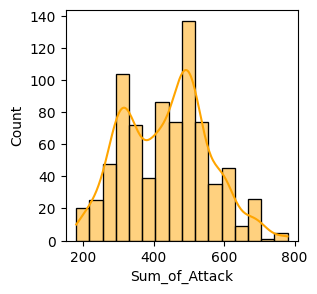

In [28]:
plt.figure(figsize=(3,3))
sns.histplot(x=data['Sum_of_Attack'],color='Orange',kde=True,);
plt.show()

Вывод графика распределения: сумма атаки покемонов Функция Displot of Seaborn строит гистограмму с кривой плотности. Мы можем убрать плотность, используя опцию kde = ”False”.

Есть много альтернативных способов построить гистограмму в Python:

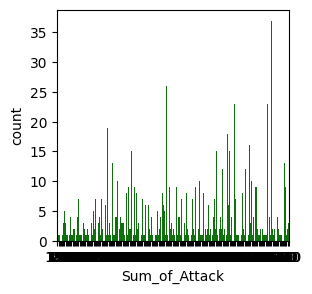

In [31]:
plt.figure(figsize=(3,3))
sns.histplot(x=data['Sum_of_Attack'],color='Green');
plt.show()

Другой способ: использовать plt.hist ()

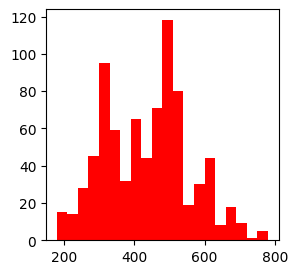

In [30]:
plt.figure(figsize=(3,3))
plt.hist(x=data["Sum_of_Attack"],color="Red",bins=20);
plt.show()

Таким образом, для многих способов построения графиков распределения. Все функции pyplot.hist, seaborn.hisplot  действуют как оболочки для гистограммы matplotlib и могут использоваться, если построение такой гистограммы вручную будет слишком громоздким.

Для дискретных переменных удобнее использовать seaborn.countplot.
Для непрерывных переменных используются pyplot.hist или seaborn.hisplot.

# Совместные участки распределения:

Совместные графики распределения объединяют информацию из графиков рассеяния и гистограмм, чтобы дать нам подробную информацию для двумерных распределений.

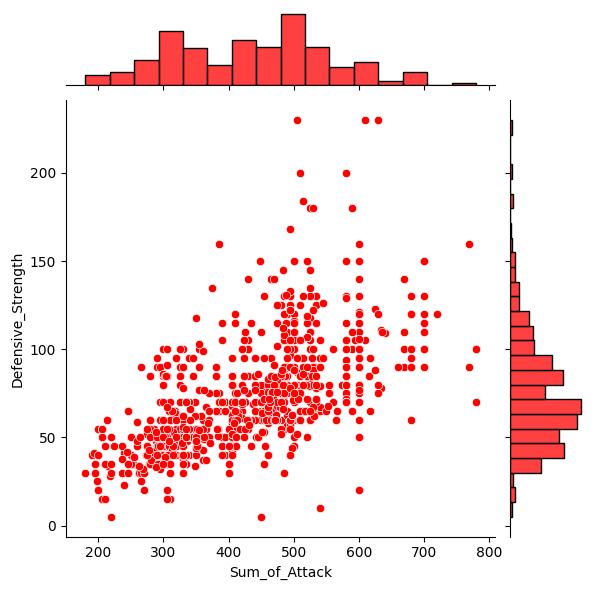

In [32]:
sns.jointplot(x=data['Sum_of_Attack'],y=data['Defensive_Strength'],color='Red');

Функция создает график, который сочетает в себе бивариантный график (например, диаграмму рассеяния) и унвариантные графики (например, гистограммы или графики плотности) для каждой переменной.

В вашем случае:

x=data['Sum_of_Attack']: переменная по оси X представляет собой сумму атак покемонов.
y=data['Defensive_Strength']: переменная по оси Y представляет собой защитную силу покемонов.

Структура графика:

Центральный график: показывает взаимосвязь между Sum_of_Attack и Defensive_Strength. Это может быть диаграмма рассеяния, которая иллюстрирует, как значения одной переменной соотносятся с другой.
Гистограммы/графики плотности: по осям X и Y будут отображены распределения каждой переменной. Это позволяет увидеть, как часто встречаются те или иные значения в каждой из переменных.

Преимущества использования jointplot():
Позволяет быстро оценить взаимосвязь между двумя переменными и их индивидуальные распределения.
Удобно для анализа данных, так как объединяет несколько визуализаций на одном графике.

# Графики плотности:

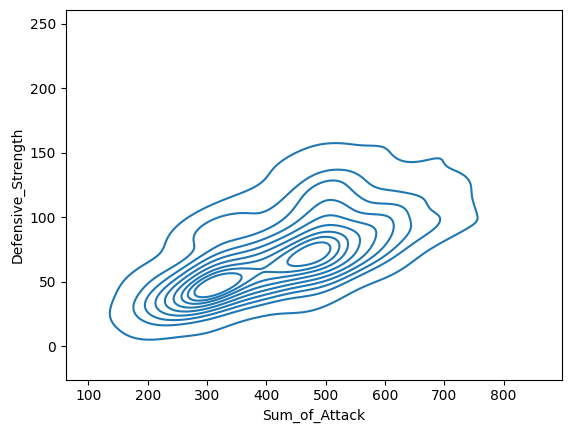

In [36]:
sns.kdeplot(x=data['Sum_of_Attack'],y=data['Defensive_Strength'])
plt.show()

Оценка плотности ядра (KDE) — это метод, который позволяет оценить вероятность распределения непрерывной переменной. Он создает плавную кривую, представляющую плотность вероятности данных, что позволяет лучше понять их распределение по сравнению с гистограммой.

### Объяснение графика

Оси графика:

###Ось X: представляет значения переменной Sum_of_Attack (сумма атак покемонов).
### Ось Y: представляет значения переменной Defensive_Strength (защитная сила покемонов).
Плотность вероятности:

###График показывает области с высокой плотностью значений. Более тёмные или светлые области указывают на более высокую концентрацию данных.
Например, если на графике есть светлая область в правом верхнем углу, это может означать, что покемоны с высокой суммой атаки также имеют высокую защитную силу.
###Форма распределения:
График позволяет увидеть форму распределения данных. Если данные имеют определённую структуру или корреляцию между переменными, это будет видно в виде определённых форм на графике.
###Использование для анализа:
Такой график полезен для анализа взаимосвязи между двумя количественными переменными. Например, можно выяснить, существуют ли закономерности или зависимости между атакой и защитой покемонов.

# Гистограмма счетчик

Гистограммы помогают нам визуализировать распределения категориальных переменных:

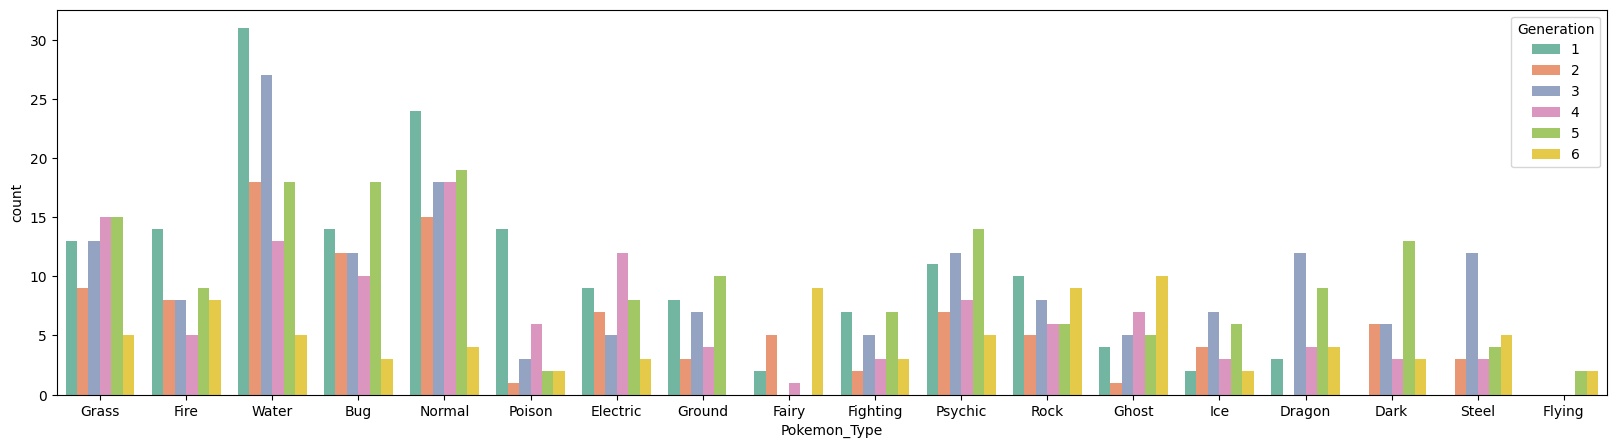

In [48]:
pkmn_type_colors = sns.color_palette("Set2", n_colors=6)
plt.figure(figsize=(20,5));
sns.countplot(x=data.Pokemon_Type, palette=pkmn_type_colors, hue=data.Generation)
plt.show()

## Объяснение графика
### Оси графика:
Ось X: представляет различные типы покемонов (например, «Огненный», «Водяной», «Травяной» и т. д.), которые находятся в столбце Pokemon_Type вашего фрейма данных data.        
Ось Y: показывает количество покемонов каждого типа.        
### Параметр hue:       
Параметр hue=data.Generation добавляет дополнительное измерение к графику, разделяя столбцы по поколениям покемонов. Это означает, что для каждого типа покемонов будут созданы отдельные столбцы (или сегменты) для каждого поколения.
Например, если у вас есть покемоны типа «Огонь», вы увидите несколько столбцов для этого типа, каждый из которых будет представлять разные поколения (например, 1-е, 2-е и т. д.).      
###Цветовая палитра:
Параметр palette=pkmn_type_colors задает цвета для различных поколений. Это позволяет визуально различать разные поколения на графике.
###Что показывает график?     
Количество покемонов по типам и поколениям: График позволяет увидеть, сколько покемонов каждого типа существует в каждом поколении. Это полезно для анализа распределения типов покемонов по поколениям.      
Сравнение типов и поколений: Вы можете легко сравнить количество покемонов разных типов как внутри одного поколения, так и между поколениями.
Визуальная интерпретация данных: График даёт наглядное представление о том, как распределены покемоны по типам и их поколениям, что может быть полезно для дальнейшего анализа или принятия решений.     

#Тепловая карта

Тепловая карта помогает нам визуализировать матричные данные в виде горячих и холодных точек. Теплые цвета обозначили разделы с наибольшей корреляцией .

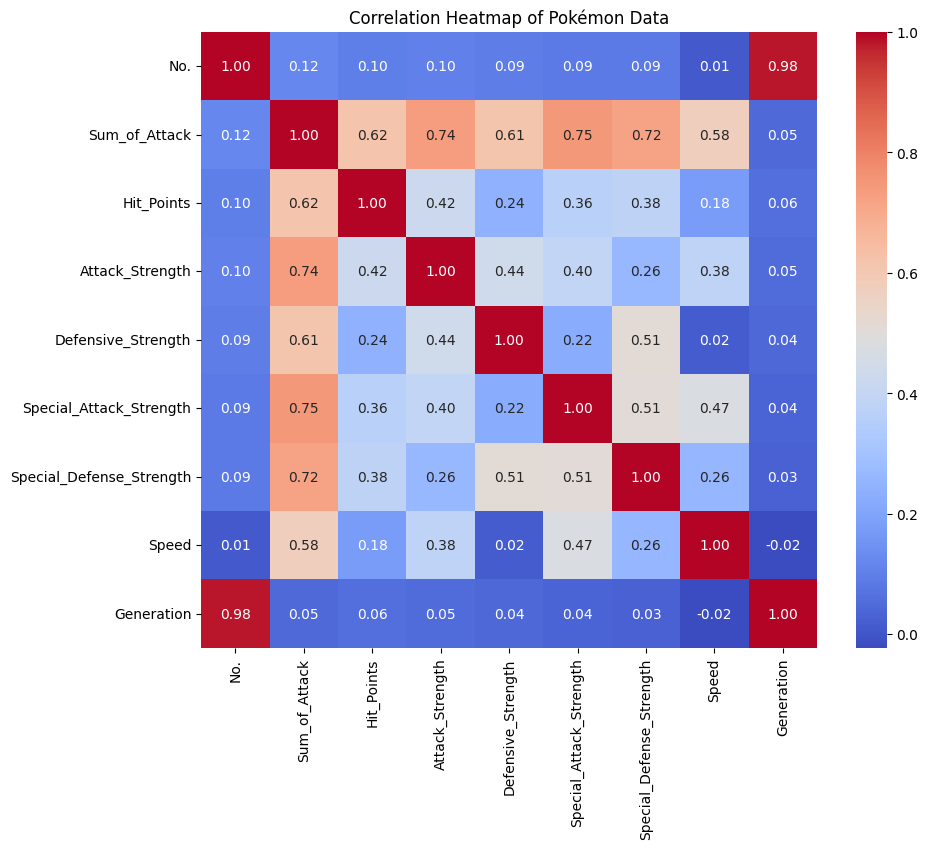

In [52]:
correlation_matrix = data.select_dtypes(include=['number']).corr()  # Для вычисления корреляции используйте только числовые столбцы:
plt.figure(figsize=(10,8)) # Устанавливаем размер графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Pokémon Data')
plt.show()

###Объяснение параметров
annot=True: добавляет значения коэффициентов корреляции в каждую ячейку тепловой карты.   
cmap='coolwarm': задает цветовую палитру для визуализации. Вы можете выбрать любую другую палитру по вашему усмотрению.    
fmt=".2f": форматирует значения до двух знаков после запятой.
square=True: делает ячейки квадратными.    
###Что показывает тепловая карта?
Корреляция между переменными: Тепловая карта визуализирует степень линейной зависимости между числовыми переменными в вашем наборе данных. Значения варьируются от -1 до +1:     
+1 означает полную положительную корреляцию (когда одна переменная увеличивается, другая также увеличивается).        
-1 означает полную отрицательную корреляцию (когда одна переменная увеличивается, другая уменьшается).      
0 означает отсутствие корреляции.      
Простота интерпретации: цветовая шкала помогает быстро определить сильные и слабые связи между переменными.      

#Диаграмма рассеяния:

На точечной диаграмме точки используются для представления значений двух различных числовых переменных. Положение каждой точки на горизонтальной и вертикальной оси указывает значения для отдельной точки данных.

Диаграммы разброса используются для наблюдения за взаимосвязями между переменными.

Я сравнил статистику атаки и защиты для наших покемонов с помощью диаграмм рассеяния.

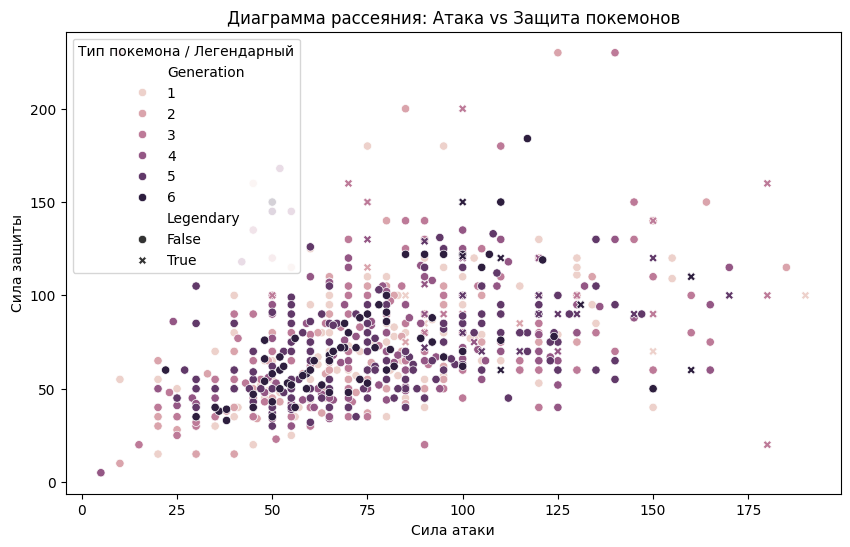

In [54]:
plt.figure(figsize=(10,6)) # Устанавливаем размер графика
sns.scatterplot(data=data, x='Attack_Strength', y='Defensive_Strength', hue='Generation', style='Legendary')
plt.title('Диаграмма рассеяния: Атака vs Защита покемонов')
plt.xlabel('Сила атаки')
plt.ylabel('Сила защиты')
plt.legend(title='Тип покемона / Легендарный')
plt.show()

### Объяснение параметров   
data=data: указывает DataFrame с вашими данными.
x='Attack_Strength': задает переменную по оси X (сила атаки).   
y='Defensive_Strength': задает переменную по оси Y (сила защиты).   
hue='Generation': добавляет цветовую кодировку по номеру поколения.  
style='Legendary': добавляет различные стили маркеров для легендарных и нелегендарных покемонов.
### Что показывает график?
Взаимосвязь между атакой и защитой: График позволяет визуально оценить корреляцию между силой атаки и силой защиты покемонов.
Цветовая кодировка: Разные цвета представляют разные типы покемонов. Это помогает увидеть распределение типов в зависимости от их статистики.
Стиль маркеров: Разные формы маркеров показывают различие между легендарными и обычными покемонами.

# Boxplot

Диаграмма ящик диаграмма используется для изображения групп числовых данных через их квартили.




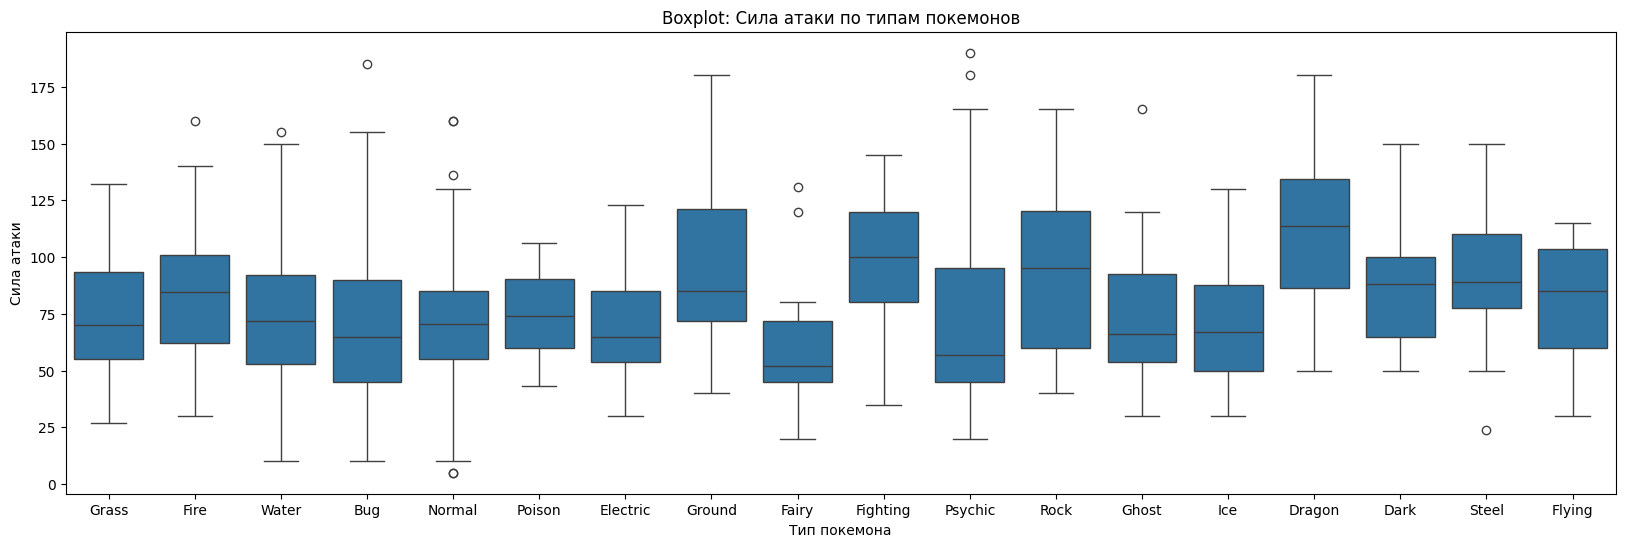

In [56]:
plt.figure(figsize=(20,6)) # Устанавливаем размер графика
sns.boxplot(x='Pokemon_Type', y='Attack_Strength', data=data)
plt.title('Boxplot: Сила атаки по типам покемонов')
plt.xlabel('Тип покемона')
plt.ylabel('Сила атаки')
plt.show()


###Объяснение параметров
x='Pokemon_Type': задает переменную по оси X (типы покемонов).
y='Attack_Strength': задает переменную по оси Y (сила атаки).
data=data: указывает DataFrame с вашими данными.
### Что показывает график?
Распределение силы атаки: Boxplot показывает медиану (линия внутри ящика), первый и третий квартили (границы ящика) и выбросы (точки за пределами усов).
Сравнение типов покемонов: Вы можете увидеть различия в распределении силы атаки между разными типами покемонов.
Выбросы: Точки за пределами усов указывают на выбросы в данных.

#Скрипичный график

Cкрипичный график - это альтернатива ящику с усами . Они показывают распределение (по толщине скрипки), а не только сводную статистику.

Здесь  показано распределение атак по основным типам покемонов.

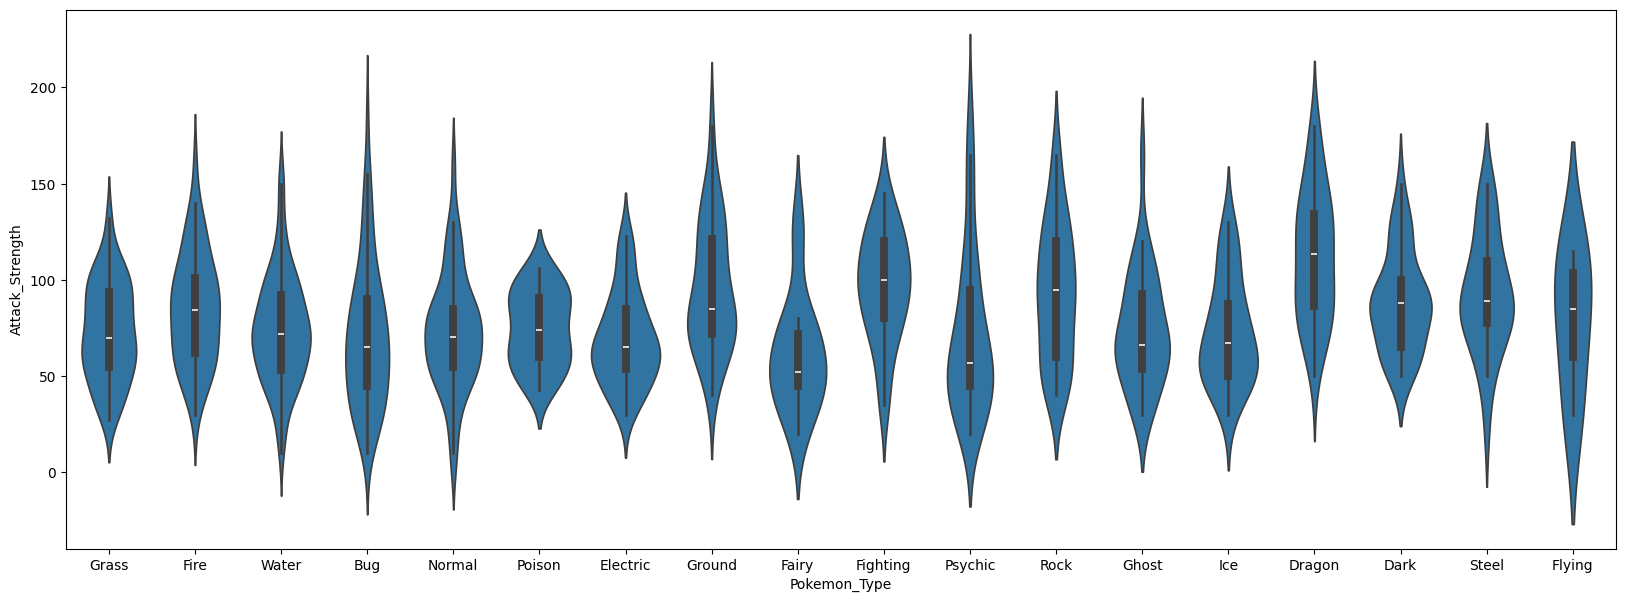

In [60]:
plt.figure(figsize=(20,7));
sns.violinplot(x=data.Pokemon_Type, y = data['Attack_Strength']);
pkmn_type_colors = sns.color_palette("Set2", n_colors=6)

По Дефолту все краситься в один цвет. Исправим

In [69]:
pkmn_type_colors = ['#78C850', # Grass
 '#F08030', # Fire
 '#6890F0', # Water
 '#A8B820', # Bug
 '#A8A878', # Normal
 '#A040A0', # Poison
 '#F8D030', # Electric
 '#E0C068', # Ground
 '#EE99AC', # Fairy
 '#C03028', # Fighting
 '#F85888', # Psychic
 '#B8A038', # Rock
 '#705898', # Ghost
 '#98D8D8', # Ice
 '#7038F8', # Dragon
 '#FF4500', #Dark
 '#4B0082' , #Steel
  '#ADFF2F', #Flying

 ]

Либо не мучиться и задать автоматически по длине объектов, но мне нравиться больше палитра первого варианта

In [67]:
pkmn_type_colors = sns.color_palette("Set2", n_colors=len(data['Pokemon_Type'].unique()))

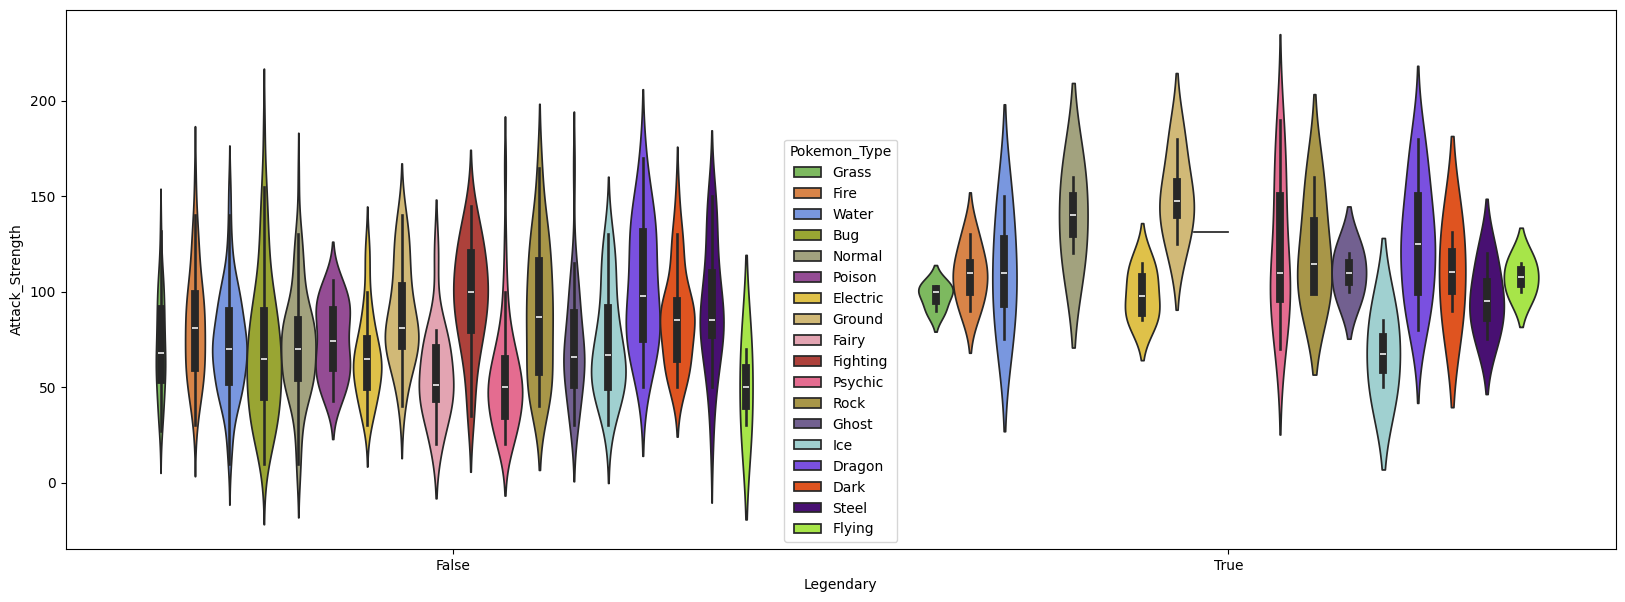

In [78]:
plt.figure(figsize=(20,7));
sns.violinplot(x=data.Legendary, y = data.Attack_Strength, palette = pkmn_type_colors, hue=data.Pokemon_Type);

###Оси графика:
Ось X: представляет статус покемонов — легендарные (True) и нелегендарные (False). Это категориальная переменная.   
Ось Y: отображает значения силы атаки (Attack_Strength), которая является числовой переменной.
###Параметр hue:
hue=data.Pokemon_Type: добавляет цветовую кодировку для различных типов покемонов. Это позволяет визуально разделить данные внутри каждой категории (легендарные и нелегендарные) по типам покемонов. Каждый тип будет представлен своим цветом, что поможет увидеть, как разные типы распределены среди легендарных и нелегендарных покемонов.
###Форма "скрипки":
Виолиновая диаграмма сочетает в себе элементы ящика с усами (box plot) и оценки плотности вероятности (kernel density estimate). Она показывает не только медиану и квартили, но и форму распределения данных.     
Ширина "скрипки" в различных точках указывает на плотность данных — более широкие участки означают большую концентрацию значений силы атаки.
###Что показывает график?
Распределение силы атаки: График позволяет увидеть, как распределена сила атаки среди легендарных и нелегендарных покемонов. Например, если у легендарных покемонов более широкая "скрипка" на определенном уровне силы атаки, это может указывать на то, что они имеют более высокие значения атаки по сравнению с нелегендарными.     
Сравнение типов покемонов: Цветовая кодировка по типам позволяет быстро оценить, какие типы покемонов чаще встречаются среди легендарных и нелегендарных. Например, если определенный тип доминирует среди легендарных покемонов, это может быть интересным наблюдением.    
Выбросы: Если есть выбросы (значения значительно отличающиеся от остальных), они будут видны на графике как точки за пределами "скрипок".

# Swarmplots

Как вы видели, графики скрипки отлично подходят для визуализации распределений.

Однако, поскольку в нашем наборе данных всего 150 покемонов, мы можем просто отобразить каждую точку. Вот тут-то и появляется график роя. Эта визуализация покажет каждую точку, «сложив» точки с похожими значениями.

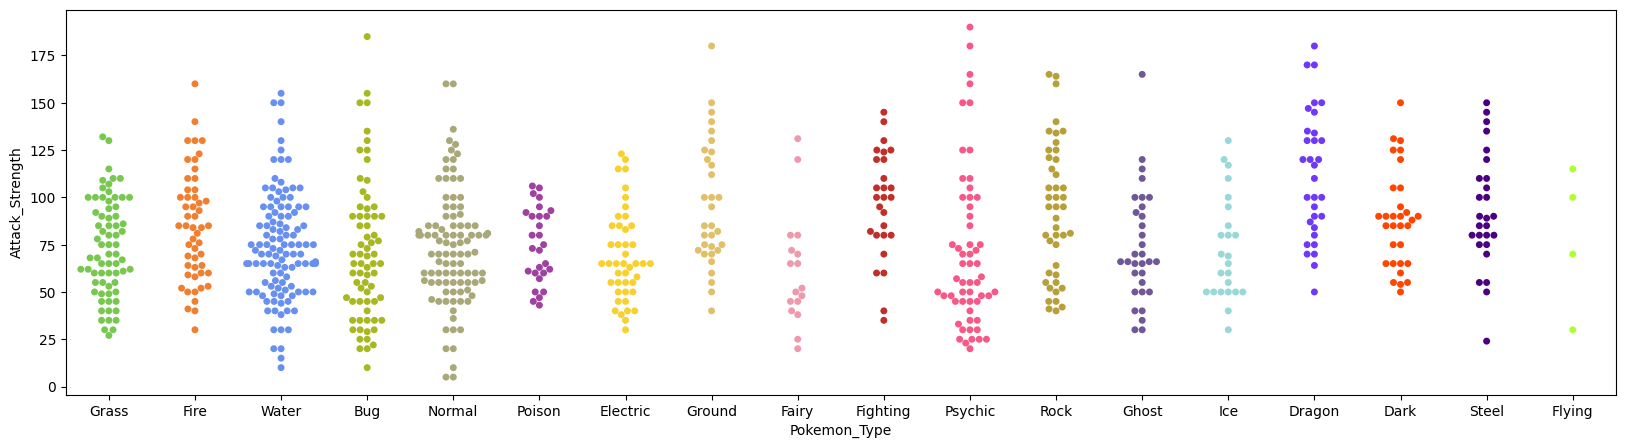

In [86]:
plt.figure(figsize=(20,5));
sns.swarmplot(x=data.Pokemon_Type,y=data.Attack_Strength,palette=pkmn_type_colors, hue=data.Pokemon_Type);

Выглядит неплохо, но для лучшего визуального эффекта мы можем объединить  два последних графика, только без объединения по классу Legendary(можно и с ним но ужу сильно накладываться будет)! В конце концов, они отображают одну и ту же информацию.

# Вышележащие участки

<ipython-input-113-951bf7b0e40f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data.Pokemon_Type, y = data.Attack_Strength,


<Axes: xlabel='Pokemon_Type', ylabel='Attack_Strength'>

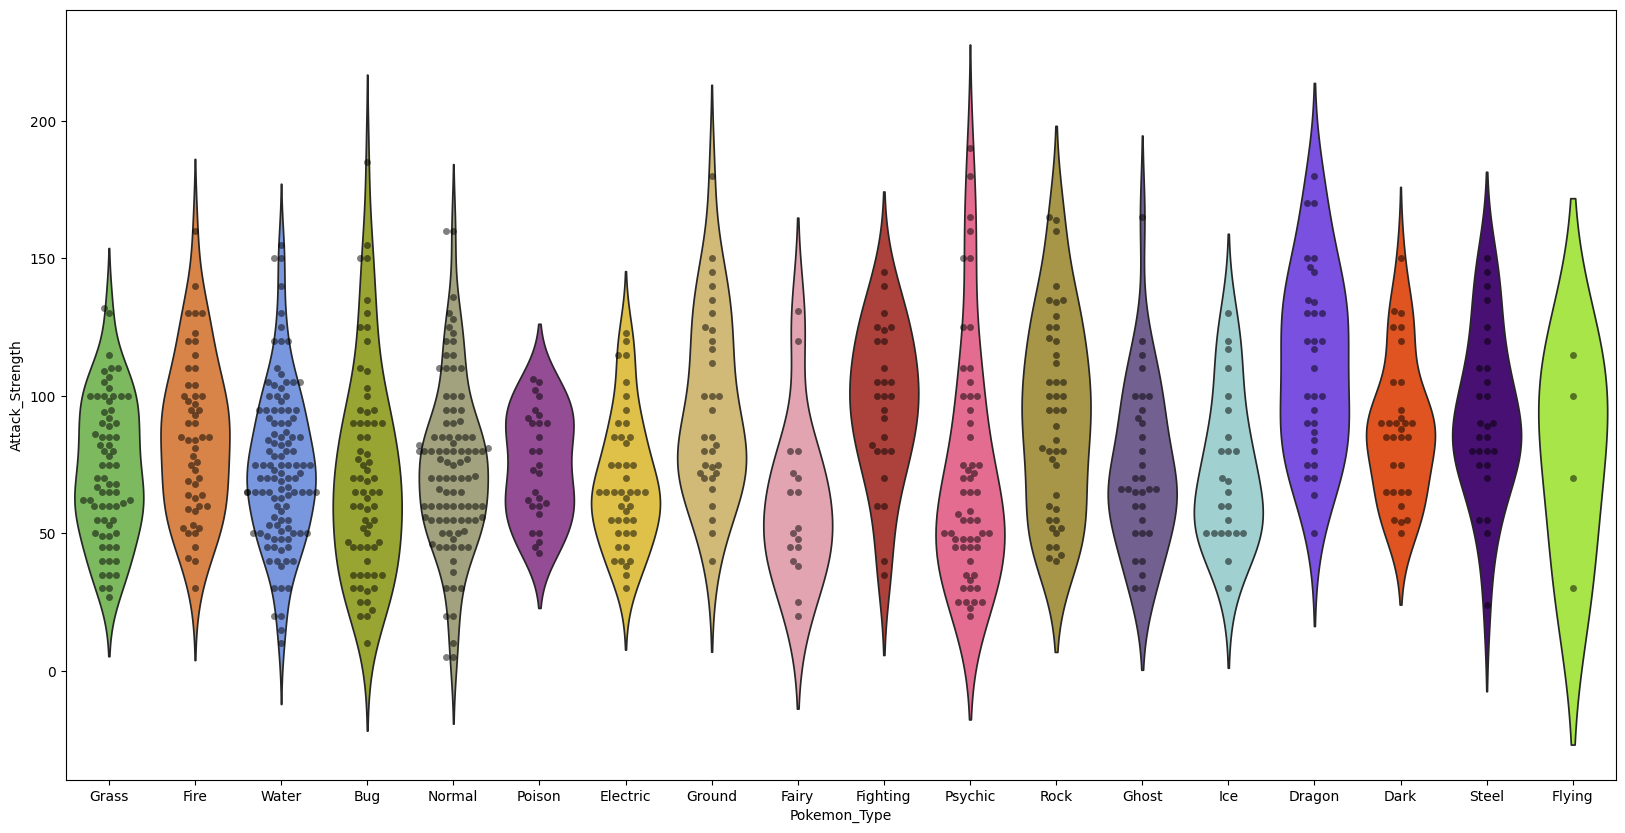

In [113]:
plt.figure(figsize=(20,10))
sns.violinplot(x=data.Pokemon_Type, y = data.Attack_Strength,
inner=None, palette = pkmn_type_colors);
sns.swarmplot(x='Pokemon_Type',
y='Attack_Strength',
data=data,
color='black', #making points black
alpha=0.5)

#Факторные графики

Факторные графики позволяют легко разделить графики по категориальным классам.

<Figure size 500x1500 with 0 Axes>

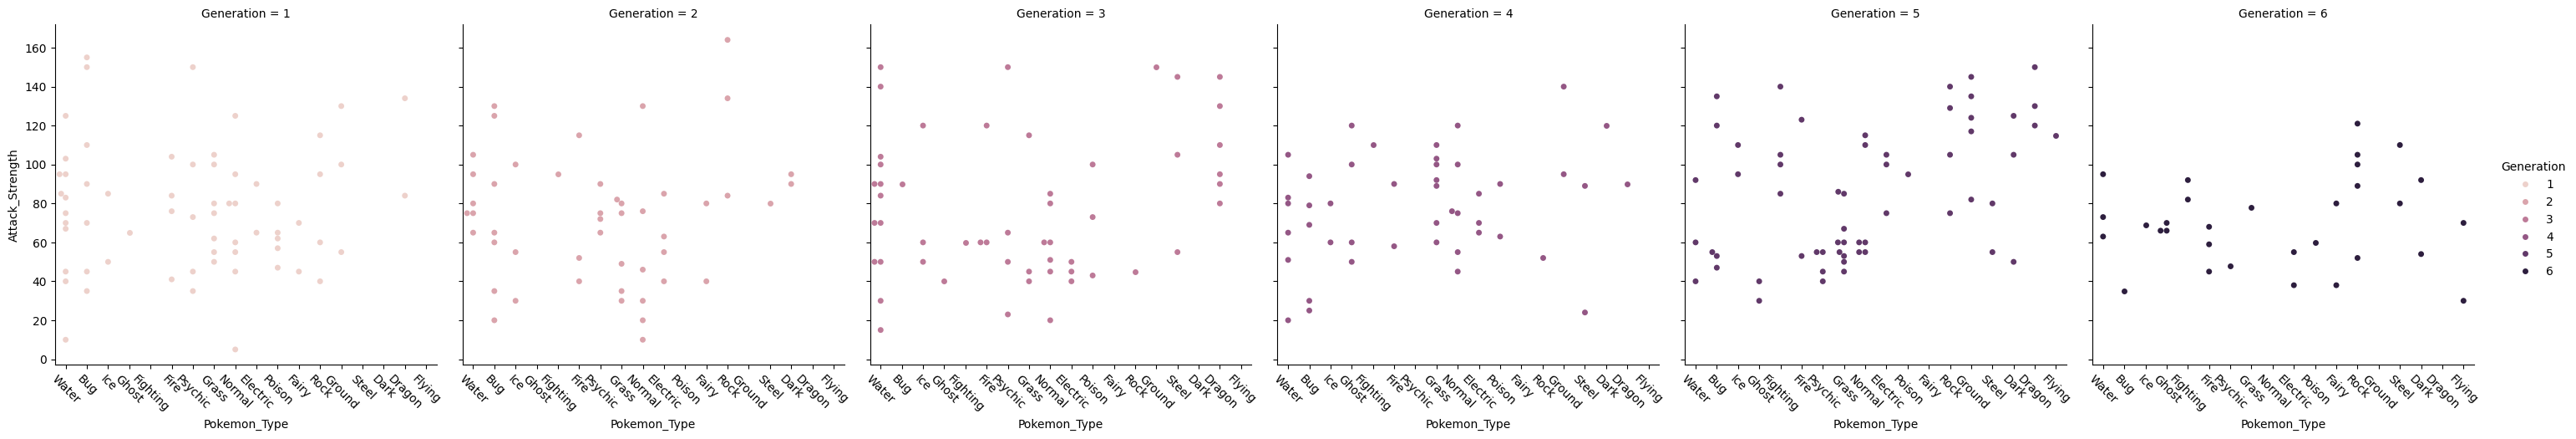

In [20]:
sampled_data = data.sample(300)  # Уменьшели количества данных для визуального экстаза
plt.figure(figsize=(5,15))
factplot= sns.catplot(x="Pokemon_Type",y="Attack_Strength",data=sampled_data,hue="Generation",col="Generation",kind="swarm");
factplot.set_xticklabels(rotation=-45)
plt.show()

Я надеюсь, что вы нашли это руководство полезным и сможете его использовать. Удачи в изучении данных и удачного обучения!

Seaborn предлагает множество графиков и функций. Вы всегда можете узнать больше на https://seaborn.pydata.org/.